In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
#IMPORT DATASET
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [4]:
#menampilkan data frame
print(data_train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
#menampilkan data frame
print(data_test.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [6]:
data_train.keys()


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
data_train['BedroomAbvGr'].describe()


count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

In [8]:
data_train['KitchenAbvGr'].describe()


count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64

In [9]:
data_train.duplicated().sum()


0

In [10]:
#pengecekkan nilai null pada data_train dan data_test
NaN = pd.concat([data_test.isna().sum(), data_train.isna().sum(), data_train.dtypes], axis=1, keys=['test','train','type data'])
NaN[NaN.sum(axis=1)>0]

C:\Users\User\AppData\Local\Temp/ipykernel_2032/288595574.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  NaN[NaN.sum(axis=1)>0]


,test,train,type data
MSZoning,4.0,0,object
LotFrontage,227.0,259,float64
Alley,1352.0,1369,object
Utilities,2.0,0,object
Exterior1st,1.0,0,object
Exterior2nd,1.0,0,object
MasVnrType,16.0,8,object
MasVnrArea,15.0,8,float64
BsmtQual,44.0,37,object
BsmtCond,45.0,37,object


In [11]:
#karena kolom diatas kebanyakan yang null adalah kolom kategorikal maka lebih baik didrop aja, karna gk begitu ngaruh klo data kategorikal diisi sama nilai rata2.
#tapi untuk beberapa kolom yang bertipe int/float ttp dipertahanin dan baris yang hilang diisi dengan nilai rata-rata pada kolom tersebut

In [12]:
train_bersih= data_train.drop((NaN[NaN['train'] > 1]).index, 1)

C:\Users\User\AppData\Local\Temp/ipykernel_2032/2636027944.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_bersih= data_train.drop((NaN[NaN['train'] > 1]).index, 1)


In [13]:
train_bersih = train_bersih.drop(train_bersih.loc[train_bersih['Electrical'].isnull()].index)


In [14]:
train_bersih.shape

(1459, 63)

In [15]:
print("shape dataset train" + " " + str(data_train.shape))
print("shape dataset train setelah dibersihkan:" + " " + str(train_bersih.shape))
train_bersih.keys()


shape dataset train (1460, 81)
shape dataset train setelah dibersihkan: (1459, 63)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [16]:
train_bersih.isna().sum().sum()

0

<AxesSubplot: >

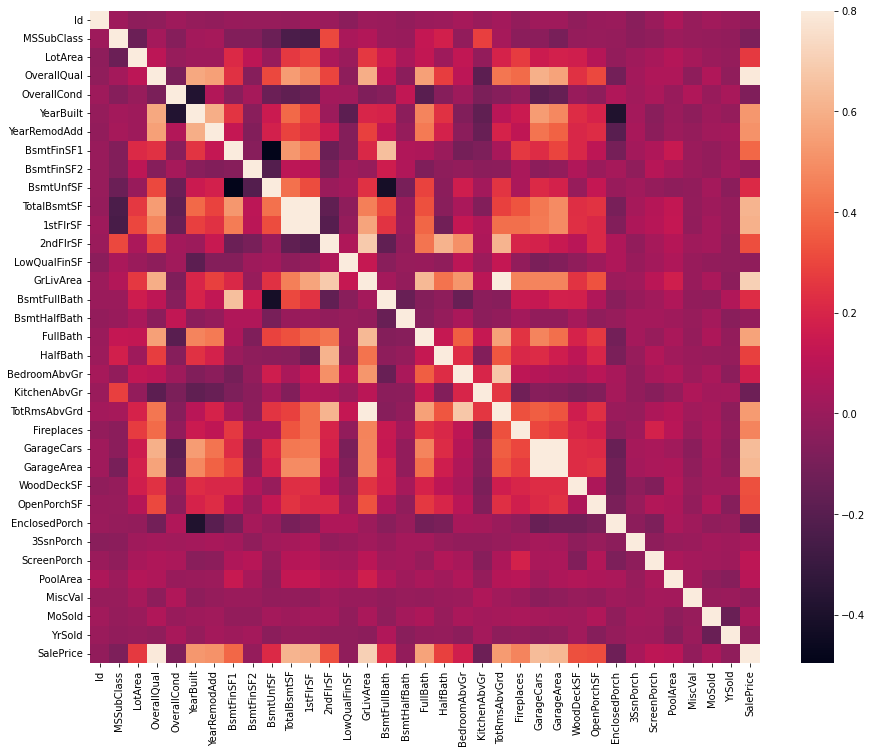

In [17]:
#memvisualisasikan korelasi antar kolom dalam heatmap
corr = train_bersih.corr()
fig, axes = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, vmax=.8)

In [18]:
#karna kolom saleprice adalah sebuah label, maka sekarang kita lihat korelasi saleprice terhadap kolom lain
korelasi_train = train_bersih.select_dtypes(include=[np.number])
korelasi_train.columns
correlation = korelasi_train.corr()
print(correlation['SalePrice'].sort_values(ascending=False), '\n')


SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
YearRemodAdd     0.507430
Fireplaces       0.466968
BsmtFinSF1       0.386436
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
ScreenPorch      0.111419
PoolArea         0.092397
MoSold           0.046380
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
BsmtHalfBath    -0.016873
MiscVal         -0.021200
Id              -0.021756
LowQualFinSF    -0.025620
YrSold          -0.028907
OverallCond     -0.077924
MSSubClass      -0.084230
EnclosedPorch   -0.128627
KitchenAbvGr    -0.135935
Name: SalePrice, dtype: float64 



In [19]:
#Exploratory Data Analysis (EDA)

In [20]:
train_bersih.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [21]:
print("max YearBuilt:" + " " + str(train_bersih["YearBuilt"].max()))
print("min YearBuilt:" + " " + str(train_bersih["YearBuilt"].min()))

max YearBuilt: 2010
min YearBuilt: 1872


In [22]:
print("max YearRemodAdd:" + " " + str(train_bersih["YearRemodAdd"].max()))
print("min YearRemodAdd:" + " " + str(train_bersih["YearRemodAdd"].min()))

max YearRemodAdd: 2010
min YearRemodAdd: 1950


C:\Users\User\AppData\Local\Temp/ipykernel_2032/2588858792.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_bersih['SalePrice'])


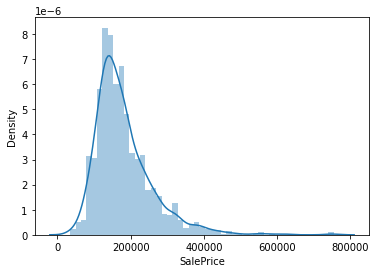

In [23]:
sns.distplot(train_bersih['SalePrice'])
plt.show()

In [24]:
#untuk membuat model machine learning Regresi Linear maka data harus terdistribusi normal
#sedangkan plot diatas menampilkan bahwa kolom SalePrice condong ke kanan, tidak terdistribusi normal

In [25]:
#bisa kita lihat bahwa

In [26]:
print("Skewness: %f" % train_bersih['SalePrice'].skew())
print("Kurtosis: %f" % train_bersih['SalePrice'].kurt())


Skewness: 1.881943
Kurtosis: 6.529263


C:\Users\User\AppData\Local\Temp/ipykernel_2032/716386116.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_bersih['SalePrice'])


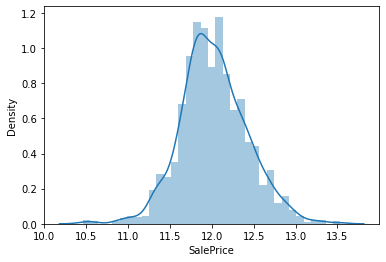

In [27]:
#mengubah variabel target(sale price) dengan numpy
train_bersih['SalePrice'] = np.log1p(train_bersih['SalePrice'])
sns.distplot(train_bersih['SalePrice'])
plt.show()


In [28]:
train_dum = pd.get_dummies(train_bersih)
train_dum.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [29]:
train_dum.shape

(1459, 222)

In [30]:
#Regression Linear

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


In [32]:
# x = semua kolom kecuali kolom terakhir yang di ujung sebelah kanan dataset atau SalePrice
# y = SalePrice
scaler = StandardScaler()
X = train_dum.iloc[:, :-1]
y = train_dum[['SalePrice']]
# X_train: Untuk menampung data source yang akan dilatih.
# X_test: Untuk menampung data target yang akan dilatih.
# y_train: Untuk menampung data source yang akan digunakan untuk testing.
# y_test: Untuk menampung data target yang akan digunakan untuk testing.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,  test_size=0.2, random_state=10)
# size = 0.2 artinya 20% dari dataset digunakan untuk testing

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1167, 221)
(292, 221)
(1167, 1)
(292, 1)


In [33]:
# fit the model
model = LinearRegression()

#Fungsi fit() digunakan untuk melatih model
model.fit(X_train, y_train)

# predict() digunakan untuk memprediksi hasil model
pred = model.predict(X_test)

# mengevaluasi model dengan MAE
# mean_absolute_error() adalah fungsi untuk men-generate nilai Mean Absolute Error (MAE) yang merupakan salah satu metode untuk mengukur seberapa baik hasil prediksi untuk kasus regresi.

print(
    'mean_squared_error : ', mean_squared_error(y_test, pred))
print(
    'mean_absolute_error : ', mean_absolute_error(y_test, pred))


mean_squared_error :  1.0644618789144942e-24
mean_absolute_error :  6.931502556099449e-13


In [34]:
print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)
list(zip(train_dum, model.coef_))


Intercept:  [-8.8917318e-11]
Coefficients:  [[ 1.10934443e-18 -1.07870747e-14 -1.99764250e-17 -1.40077836e-13
  -6.26280711e-14  1.53772394e-15  5.86553375e-16  2.83830088e-12
   2.83818346e-12  2.83824873e-12 -2.83884331e-12 -1.45929976e-11
  -1.45937238e-11 -1.45949758e-11  1.45933079e-11 -2.28089899e-13
  -5.68868249e-13 -3.25780635e-13 -3.35266320e-13  3.29253768e-14
  -1.41708303e-12  8.30308045e-14 -1.56298585e-15 -6.87921942e-14
  -1.38777878e-16  5.55111512e-17 -3.46077333e-16  5.41233725e-16
  -1.72821826e-16 -1.33226763e-15  2.28983499e-16 -2.94902991e-17
   1.75328502e-14  3.89688282e-14  1.00000000e+00 -1.64070146e-12
  -1.46814852e-13  1.12661616e-12  6.33489788e-13  1.27599320e-13
  -5.39238793e-14  6.27269504e-14 -3.10279580e-13 -3.12944115e-13
   7.35304179e-13 -4.24337648e-13 -3.96444162e-13 -2.20601315e-13
   7.65626711e-14  2.20939586e-13 -1.18224831e-12  1.18721743e-12
   4.86355747e-14 -1.58501684e-14  2.18678374e-13 -1.34904241e-13
   7.77936743e-14  1.70991693e-1

[('Id',
  array([ 1.10934443e-18, -1.07870747e-14, -1.99764250e-17, -1.40077836e-13,
         -6.26280711e-14,  1.53772394e-15,  5.86553375e-16,  2.83830088e-12,
          2.83818346e-12,  2.83824873e-12, -2.83884331e-12, -1.45929976e-11,
         -1.45937238e-11, -1.45949758e-11,  1.45933079e-11, -2.28089899e-13,
         -5.68868249e-13, -3.25780635e-13, -3.35266320e-13,  3.29253768e-14,
         -1.41708303e-12,  8.30308045e-14, -1.56298585e-15, -6.87921942e-14,
         -1.38777878e-16,  5.55111512e-17, -3.46077333e-16,  5.41233725e-16,
         -1.72821826e-16, -1.33226763e-15,  2.28983499e-16, -2.94902991e-17,
          1.75328502e-14,  3.89688282e-14,  1.00000000e+00, -1.64070146e-12,
         -1.46814852e-13,  1.12661616e-12,  6.33489788e-13,  1.27599320e-13,
         -5.39238793e-14,  6.27269504e-14, -3.10279580e-13, -3.12944115e-13,
          7.35304179e-13, -4.24337648e-13, -3.96444162e-13, -2.20601315e-13,
          7.65626711e-14,  2.20939586e-13, -1.18224831e-12,  1.18721

In [35]:
# model.score(X_test, y_test)

NameError: name 'confusion_matrix' is not defined

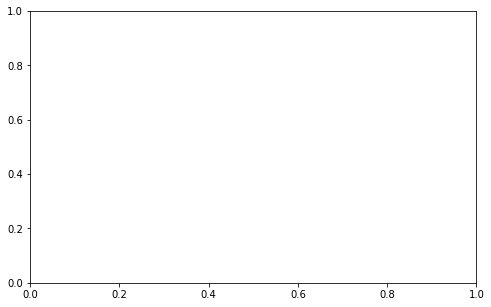

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()


In [ ]:
test_bersih= data_test.drop((NaN[NaN['test'] > 1]).index, 1)

In [ ]:
print("shape dataset test" + " " + str(data_test.shape))
print("shape dataset test setelah dibersihkan:" + " " + str(test_bersih.shape))
test_bersih.keys()
